In [1]:
import numpy as np
import random
import math

# Importing QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# Import basic plotting tools
from qiskit.tools.visualization import plot_histogram

# Quantum program setup 
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url

In [2]:
# backend = 'ibmqx2'
shots = 1    # the number of shots
backend = 'local_qasm_simulator'

# Creating registers
qr = Q_program.create_quantum_register("qr", 2)
cr = Q_program.create_classical_register("cr", 2)

# Creating a shared singlet state
singlet = Q_program.create_circuit("singlet", [qr], [cr])
singlet.x(qr[0])
singlet.x(qr[1])
singlet.h(qr[0])
singlet.cx(qr[0],qr[1])

In [3]:
# Alice's and Bob's measurement choice strings 
aliceMeasurementsChoices = []
bobMeasurementsChoices = []

measuremensChoicesLength = 10 # length of the strings

# Random strings generation
for i in range(measuremensChoicesLength):
    aliceMeasurementsChoices.append(random.randint(0, 2))
    bobMeasurementsChoices.append(random.randint(0, 2))
    
#print(aliceMeasurementsChoices)
#print(bobMeasurementsChoices)

In [4]:
## Alice's measurement circuits

# measurement of spin projection onto (1;0;0) vector; standard X-measurement
measureA1 = Q_program.create_circuit('measureA1', [qr], [cr])
measureA1.h(qr[0])
measureA1.measure(qr[0],cr[0])

# measurement of spin projection onto (1/sqt(2);0;1/(sqrt(2)) vector
measureA2 = Q_program.create_circuit('measureA2', [qr], [cr])
measureA2.s(qr[0])
measureA2.h(qr[0])
measureA2.t(qr[0])
measureA2.h(qr[0])
measureA2.measure(qr[0],cr[0])

# measurement of spin projection onto (0;1;0) vector; standard Z-measurement
measureA3 = Q_program.create_circuit('measureA3', [qr], [cr])
measureA3.measure(qr[0],cr[0])

## Bob's measurement circuits

# measurement of spin projection onto (1/sqt(2);0;1/(sqrt(2)) vector
measureB1 = Q_program.create_circuit('measureB1', [qr], [cr])
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.t(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1],cr[1])

# measurement of spin projection onto (0;0;1) vector; 
measureB2 = Q_program.create_circuit('measureB2', [qr], [cr])
measureB2.measure(qr[1],cr[1])

# measurement of spin projection onto (-1/sqt(2);0;1/(sqrt(2)) vector
measureB3 = Q_program.create_circuit('measureB3', [qr], [cr])
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.tdg(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1],cr[1])

In [48]:
Q_program.add_circuit('gavno3', singlet + measureA1 + measureB1) # Measurement of Alice's and Bob's qubits

result3 = Q_program.execute('gavno3', backend=backend, shots=1000, max_credits=3, wait=10, timeout=240, silent=False)

print(result3.get_counts('gavno3'))

running on backend: local_qasm_simulator
{'01': 437, '10': 428, '00': 79, '11': 56}


In [47]:
## Arrays of Alice's and Bob's measurements
aliceMeasurements = [measureA1, measureA2, measureA3]
bobMeasurements = [measureB1, measureB2, measureB3]

In [65]:
circuits = [] # array of prepared circuits

for k in range(measuremensChoicesLength):
    circuitName = 'A' + str(aliceMeasurementsChoices[k]+1) + '_B' + str(bobMeasurementsChoices[k]+1)
    Q_program.add_circuit(circuitName, singlet + aliceMeasurements[aliceMeasurementsChoices[k]] + bobMeasurements[bobMeasurementsChoices[k]]) # Measurement of Alice's and Bob's qubits
    circuits.append(circuitName) # add measurement of singlet to circuits array

In [70]:
result = Q_program.execute(circuits, backend=backend, shots=300, max_credits=3, wait=10, timeout=240, silent=False)

#Q_program.get_qasms(circuits)

running on backend: local_qasm_simulator


In [71]:
# print some results of measurements

for k in range(measuremensChoicesLength):
    print(str(circuits[k]) + ': ' + str(result.get_counts(circuits[k])))

A2_B1: {'01': 133, '10': 167}
A2_B1: {'01': 133, '10': 167}
A2_B1: {'01': 133, '10': 167}
A2_B1: {'01': 133, '10': 167}
A2_B1: {'01': 133, '10': 167}
A2_B1: {'01': 133, '10': 167}
A2_B1: {'01': 133, '10': 167}
A2_B1: {'01': 133, '10': 167}
A2_B1: {'01': 133, '10': 167}
A2_B1: {'01': 133, '10': 167}


In [22]:
# Basis choises check stage

sameBasisMeasurements = []

for k in range(measuremensChoicesLength):
    if aliceMeasurementsChoices[k] == bobMeasurementsChoices[k]:
        sameBasisMeasurements.append(aliceMeasurementsChoices[k])

sameBasisMeasurements

[1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1]

running on backend: local_qasm_simulator


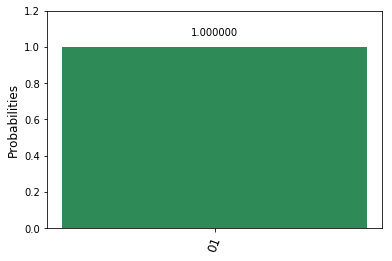

In [26]:
### TEST FIELD ###

state = Q_program.create_circuit("state", [qr], [cr])
state.x(qr[0])
state.x(qr[1])
state.h(qr[0])
state.cx(qr[0],qr[1])
state.barrier()

state.h(qr[0])
#state.u3(math.pi, math.pi/4., 3.*math.pi/4., qr[0])
#state.u3(math.pi, math.pi/2., math.pi/2., qr[0])

state.measure(qr[0],cr[0])

#state.u3(math.pi, math.pi/4., 3.*math.pi/4., qr[1])
state.u3(math.pi, math.pi/2., math.pi/2., qr[1])
#state.u3(math.pi, 3.*math.pi/4., math.pi/4., qr[1])

state.measure(qr[1],cr[1])

cir = ['state']

Q_program.get_qasms(cir)

res = Q_program.execute(cir, backend=backend, shots=1, max_credits=3, wait=10, timeout=240, silent=False)

plot_histogram(res.get_counts(cir[0]))

In [ ]:
obs = {"00": 1, "11": 1, "01": -1, "10": -1}

for k in range(measuremensChoicesLength):
    print(str(circuits[k]) + ": " + str(result.average_data(circuits[k], obs)))

In [ ]:
## Alice's measurement circuits

# measurement of spin projection onto (1;0;0) vector; standard X-measurement
measureA1 = Q_program.create_circuit('measureA1', [qr], [cr])
measureA1.u3(math.pi, 0, math.pi, qr[0])
measureA1.measure(qr[0],cr[0])

# measurement of spin projection onto (1/sqt(2);1/(sqrt(2);0) vector
measureA2 = Q_program.create_circuit('measureA2', [qr], [cr])
measureA2.u3(math.pi, math.pi/4., 3.*math.pi/4., qr[0])
measureA2.measure(qr[0],cr[0])

# measurement of spin projection onto (0;1;0) vector; standard Y-measurement
measureA3 = Q_program.create_circuit('measureA3', [qr], [cr])
measureA3.u3(math.pi, math.pi/2., math.pi/2., qr[0])
measureA3.measure(qr[0],cr[0])

## Bob's measurement circuits

# measurement of spin projection onto (1/sqt(2);1/(sqrt(2);0) vector
measureB1 = Q_program.create_circuit('measureB1', [qr], [cr])
measureB1.u3(math.pi, math.pi/4., 3.*math.pi/4., qr[1])
measureB1.measure(qr[1],cr[1])

# measurement of spin projection onto (0;1;0) vector
measureB2 = Q_program.create_circuit('measureB2', [qr], [cr])
measureB2.u3(math.pi, math.pi/2., math.pi/2., qr[1])
measureB2.measure(qr[1],cr[1])

# measurement of spin projection onto (-1/sqt(2);1/(sqrt(2);0) vector
measureB3 = Q_program.create_circuit('measureB3', [qr], [cr])
measureB3.u3(math.pi, 3.*math.pi/4., math.pi/4., qr[1])
measureB3.measure(qr[1],cr[1])

## Arrays of Alice's and Bob's measurements
aliceMeasurements = [measureA1, measureA2, measureA3]
bobMeasurements = [measureB1, measureB2, measureB3]

In [46]:
##### TEST #####

gavno11 = Q_program.create_circuit('gavno11', [qr], [cr])
gavno11.x(qr[0])
gavno11.x(qr[1])
gavno11.h(qr[0])
gavno11.cx(qr[0],qr[1])
gavno11.h(qr[0])
gavno11.s(qr[1])
gavno11.h(qr[1])
gavno11.t(qr[1])
gavno11.h(qr[1])
gavno11.measure(qr[0],cr[0])
gavno11.measure(qr[1],cr[1])

gavno12 = Q_program.create_circuit('gavno12', [qr], [cr])
gavno12.x(qr[0])
gavno12.x(qr[1])
gavno12.h(qr[0])
gavno12.cx(qr[0],qr[1])
gavno12.h(qr[0])
gavno12.measure(qr[0],cr[0])
gavno12.measure(qr[1],cr[1])

gavno21 = Q_program.create_circuit('gavno21', [qr], [cr])
gavno21.x(qr[0])
gavno21.x(qr[1])
gavno21.h(qr[0])
gavno21.cx(qr[0],qr[1])
gavno21.s(qr[0])
gavno21.h(qr[0])
gavno21.t(qr[0])
gavno21.h(qr[0])
gavno21.s(qr[1])
gavno21.h(qr[1])
gavno21.t(qr[1])
gavno21.h(qr[1])
gavno21.measure(qr[0],cr[0])
gavno21.measure(qr[1],cr[1])

gavno32 = Q_program.create_circuit('gavno32', [qr], [cr])
gavno32.x(qr[0])
gavno32.x(qr[1])
gavno32.h(qr[0])
gavno32.cx(qr[0],qr[1])
gavno32.h(qr[0])
gavno32.h(qr[1])
gavno32.measure(qr[0],cr[0])
gavno32.measure(qr[1],cr[1])

Q_program.add_circuit('gavno0', singlet + measureB1 + measureA1) # Measurement of Alice's and Bob's qubits

result11 = Q_program.execute('gavno11', backend=backend, shots=500, max_credits=3, wait=10, timeout=240, silent=False)
print(result11.get_counts('gavno11'))

result12 = Q_program.execute('gavno12', backend=backend, shots=500, max_credits=3, wait=10, timeout=240, silent=False)
print(result12.get_counts('gavno12'))

result21 = Q_program.execute('gavno21', backend=backend, shots=500, max_credits=3, wait=10, timeout=240, silent=False)
print(result21.get_counts('gavno21'))

result32 = Q_program.execute('gavno32', backend=backend, shots=500, max_credits=3, wait=10, timeout=240, silent=False)
print(result32.get_counts('gavno32'))

result0 = Q_program.execute('gavno0', backend=backend, shots=500, max_credits=3, wait=10, timeout=240, silent=False)
print(result0.get_counts('gavno0'))

running on backend: local_qasm_simulator
{'00': 29, '01': 197, '10': 239, '11': 35}
running on backend: local_qasm_simulator
{'10': 133, '11': 128, '01': 108, '00': 131}
running on backend: local_qasm_simulator
{'10': 235, '01': 265}
running on backend: local_qasm_simulator
{'10': 235, '01': 265}
running on backend: local_qasm_simulator
{'01': 205, '10': 215, '00': 37, '11': 43}
